<h1 style="color:green"> Graduate Admission Predictions</h1>

![Alt text](school.jpg)
<h1 style="color:green"> Business Understanding</h1>
The project aims to develop a predictive model that utilizes graduate applicant information to assess the likelihood of their admission into various academic programs. This model will assist educational institutions in efficiently evaluating applicants, streamlining the admission process, and ensuring the selection of the most suitable candidates.

<h2 style="color:green"> Problem Statement</h2>
The traditional admissions process for graduate programs often involves manual review and evaluation of a vast number of applications, which can be time-consuming and prone to biases. As a result, there is a need for a data-driven and automated solution that can efficiently assess the chances of admission for each applicant based on their academic background, test scores, and other relevant factors.However,this should not be used excluding human understanding.

<h2 style="color:green"> Objectives</h2>
The primary objective is to design and develop a robust predictive model that will analyze historical applicant data and use various features such as undergraduate GPA, GRE scores, and other relevant information to predict the likelihood of admission for new applicants.

<h2 style="color:green">Model and Techniques used</h2>
This project used Sequantial model from tensorflow.keras
<h2 style="color:green"> Accuracy metric</h2>
The model performance of this project will be analyzed using the R2_score. Model performance was at (0.69)

![Alt text](yes.jpg)


<h2 style="color:green"> Environment Setup and Loading data</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Admission_Predict.csv')

<h2 style="color:green"> EXPLORE!</h2>

In [3]:
df.shape
#9 columns and 400 rows

(400, 9)

In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.isnull().sum()
#no nulls

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
df.drop(columns = ['Serial No.'], axis=1, inplace=True)
#drop the serial column since it ain't that important

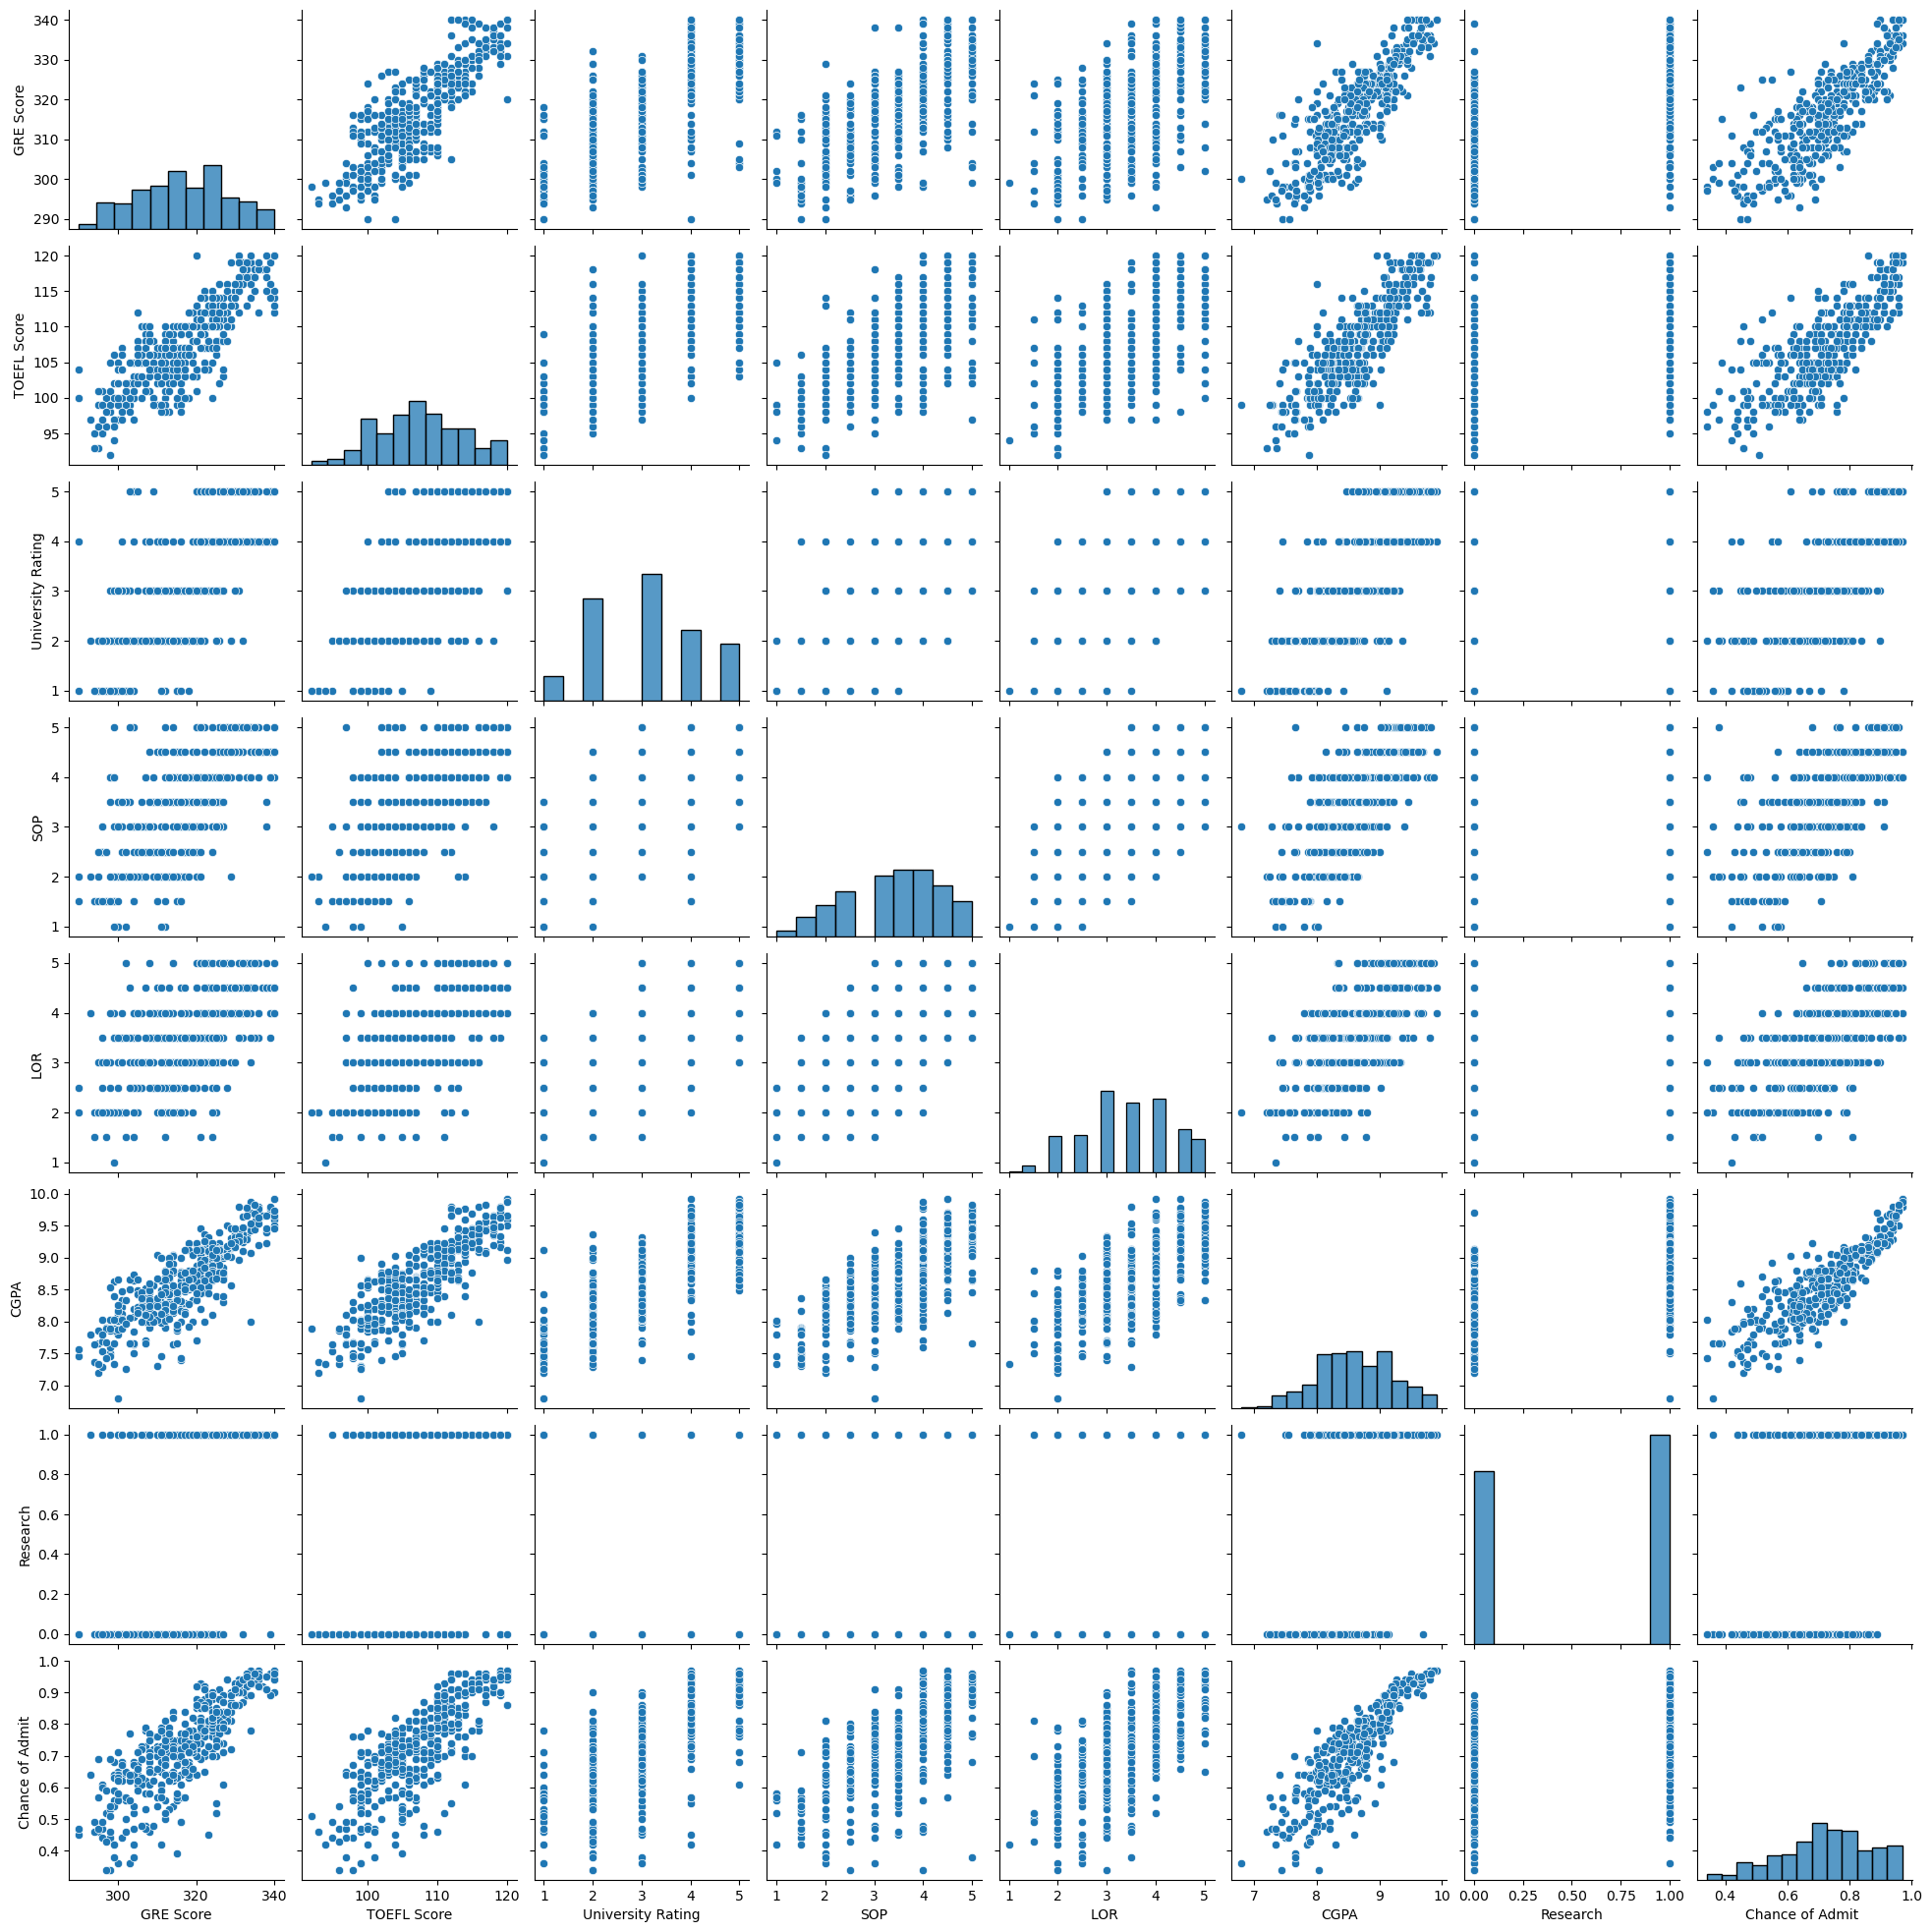

In [8]:
sns.pairplot(df)

In [9]:
df.corr()['Chance of Admit '].sort_values()
#correlation
#seems to be easy task due to the positive correlation

Research             0.553202
LOR                  0.669889
SOP                  0.675732
University Rating    0.711250
TOEFL Score          0.791594
GRE Score            0.802610
CGPA                 0.873289
Chance of Admit      1.000000
Name: Chance of Admit , dtype: float64

In [10]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [11]:
X = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values
#chance of admit is our target

In [12]:
#lets scale our values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [13]:
#we then split to obtain the train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

<h2 style="color:green"> Lets Build this Model!</h2>

In [14]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [15]:
model = Sequential()
model.add(Dense(3,activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(1,activation='linear'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 24        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='Adam',loss='mean_squared_error')

In [18]:
model.fit(X_train,y_train,epochs=10,batch_size=10,verbose=1)

Epoch 1/10
28/28 [==============================] - 7s 14ms/step - loss: 2.5231
Epoch 2/10
28/28 [==============================] - 0s 9ms/step - loss: 2.0581
Epoch 3/10
28/28 [==============================] - 0s 9ms/step - loss: 1.6648
Epoch 4/10
28/28 [==============================] - 0s 11ms/step - loss: 1.3682
Epoch 5/10
28/28 [==============================] - 0s 8ms/step - loss: 1.0940
Epoch 6/10
28/28 [==============================] - 0s 9ms/step - loss: 0.8762
Epoch 7/10
28/28 [==============================] - 0s 10ms/step - loss: 0.6813
Epoch 8/10
28/28 [==============================] - 0s 8ms/step - loss: 0.5498
Epoch 9/10
28/28 [==============================] - 0s 9ms/step - loss: 0.4443
Epoch 10/10
28/28 [==============================] - 0s 9ms/step - loss: 0.3743


In [19]:
y_pred = model.predict(X_test)


4/4 [==============================] - 1s 29ms/step


<h2 style="color:green"> Performance Evaluation</h2>

In [20]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
#lets improve its perfomance

-15.30547897499785

In [21]:
# Model evaluation and improvements

# 1. Increase the number of epochs
# 2. Increase nodes in the hiddern layer
# 3. Add more layers

In [22]:
# 1. Increase the number of epochs
model = Sequential()
model.add(Dense(3,activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='Adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size=10,verbose=1)
y_pred = model.predict(X_test)
r2_score(y_test,y_pred)

Epoch 1/100
28/28 [==============================] - 2s 10ms/step - loss: 0.6465
Epoch 2/100
28/28 [==============================] - 0s 12ms/step - loss: 0.4820
Epoch 3/100
28/28 [==============================] - 0s 9ms/step - loss: 0.3603
Epoch 4/100
28/28 [==============================] - 0s 9ms/step - loss: 0.2774
Epoch 5/100
28/28 [==============================] - 0s 9ms/step - loss: 0.2299
Epoch 6/100
28/28 [==============================] - 0s 8ms/step - loss: 0.2007
Epoch 7/100
28/28 [==============================] - 0s 9ms/step - loss: 0.1814
Epoch 8/100
28/28 [==============================] - 0s 9ms/step - loss: 0.1677
Epoch 9/100
28/28 [==============================] - 0s 9ms/step - loss: 0.1564
Epoch 10/100
28/28 [==============================] - 0s 8ms/step - loss: 0.1459
Epoch 11/100
28/28 [==============================] - 0s 8ms/step - loss: 0.1368
Epoch 12/100
28/28 [==============================] - 0s 11ms/step - loss: 0.1277
Epoch 13/100
28/28 [==============

0.6935388229701711

In [23]:
# 2. Increase nodes in the hiddern layer
model = Sequential()
model.add(Dense(10,activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='Adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size=10,verbose=1)
y_pred = model.predict(X_test)
r2_score(y_test,y_pred)

Epoch 1/100
28/28 [==============================] - 2s 9ms/step - loss: 3.2960
Epoch 2/100
28/28 [==============================] - 0s 9ms/step - loss: 1.9806
Epoch 3/100
28/28 [==============================] - 0s 9ms/step - loss: 1.1153
Epoch 4/100
28/28 [==============================] - 0s 9ms/step - loss: 0.6161
Epoch 5/100
28/28 [==============================] - 0s 10ms/step - loss: 0.3394
Epoch 6/100
28/28 [==============================] - 0s 9ms/step - loss: 0.2148
Epoch 7/100
28/28 [==============================] - 0s 9ms/step - loss: 0.1593
Epoch 8/100
28/28 [==============================] - 0s 14ms/step - loss: 0.1375
Epoch 9/100
28/28 [==============================] - 0s 9ms/step - loss: 0.1242
Epoch 10/100
28/28 [==============================] - 0s 9ms/step - loss: 0.1127
Epoch 11/100
28/28 [==============================] - 0s 9ms/step - loss: 0.1029
Epoch 12/100
28/28 [==============================] - 0s 9ms/step - loss: 0.0938
Epoch 13/100
28/28 [===============

0.5151789326141607

In [24]:
# 3. Add more layers
model = Sequential()
model.add(Dense(20,activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='Adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size=10,verbose=1)
y_pred = model.predict(X_test)
r2_score(y_test,y_pred)

Epoch 1/100
28/28 [==============================] - 3s 18ms/step - loss: 0.2106
Epoch 2/100
28/28 [==============================] - 0s 9ms/step - loss: 0.0620
Epoch 3/100
28/28 [==============================] - 0s 9ms/step - loss: 0.0441
Epoch 4/100
28/28 [==============================] - 0s 9ms/step - loss: 0.0368
Epoch 5/100
28/28 [==============================] - 0s 9ms/step - loss: 0.0311
Epoch 6/100
28/28 [==============================] - 0s 9ms/step - loss: 0.0260
Epoch 7/100
28/28 [==============================] - 0s 11ms/step - loss: 0.0224
Epoch 8/100
28/28 [==============================] - 0s 8ms/step - loss: 0.0191
Epoch 9/100
28/28 [==============================] - 0s 9ms/step - loss: 0.0173
Epoch 10/100
28/28 [==============================] - 0s 9ms/step - loss: 0.0150
Epoch 11/100
28/28 [==============================] - 0s 9ms/step - loss: 0.0133
Epoch 12/100
28/28 [==============================] - 0s 9ms/step - loss: 0.0121
Epoch 13/100
28/28 [===============

0.6464871136165474

In [25]:
# add more layers and also include validation_split
model = Sequential()
model.add(Dense(32,activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='Adam',loss='mean_squared_error')
history = model.fit(X_train,y_train,epochs=100,batch_size=10,verbose=1,validation_split=0.2)
y_pred = model.predict(X_test)
r2_score(y_test,y_pred)

Epoch 1/100
23/23 [==============================] - 6s 73ms/step - loss: 0.2486 - val_loss: 0.1189
Epoch 2/100
23/23 [==============================] - 0s 15ms/step - loss: 0.0833 - val_loss: 0.0638
Epoch 3/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0563 - val_loss: 0.0461
Epoch 4/100
23/23 [==============================] - 0s 18ms/step - loss: 0.0360 - val_loss: 0.0282
Epoch 5/100
23/23 [==============================] - 0s 15ms/step - loss: 0.0235 - val_loss: 0.0195
Epoch 6/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0157 - val_loss: 0.0153
Epoch 7/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0121 - val_loss: 0.0135
Epoch 8/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0102 - val_loss: 0.0123
Epoch 9/100
23/23 [==============================] - 0s 15ms/step - loss: 0.0086 - val_loss: 0.0118
Epoch 10/100
23/23 [==============================] - 0s 16ms/step - loss: 0.0078 - val_loss: 0.0114

0.5259986521389871

In [26]:
model.history.history
losses=pd.DataFrame(model.history.history)
losses.plot

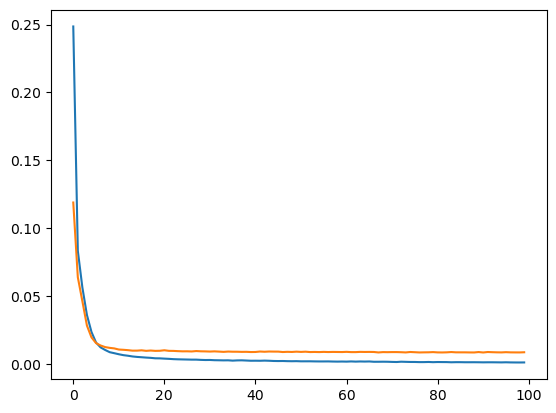

In [27]:
#lets see if the model underfits or overfits
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
predictions=model.predict(X_test)
mean_squared_error(y_test,predictions)


4/4 [==============================] - 0s 9ms/step


0.008726944149101967

In [29]:
mean_absolute_error(y_test,predictions)

0.07008051101366679

In [30]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [31]:
df['Chance of Admit '].describe

<bound method NDFrame.describe of 0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64>

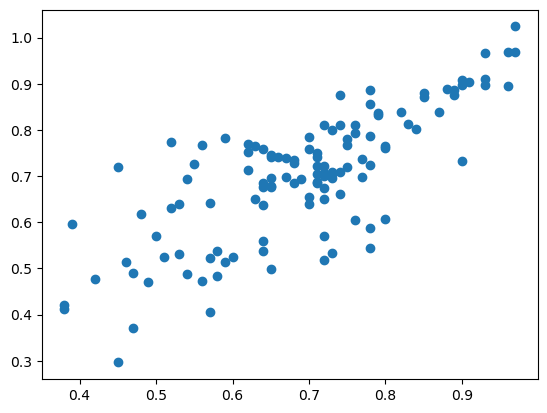

In [32]:
plt.scatter(y_test,predictions)

<h2 style="color:green"> The End!!</h2>